In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import neighbors
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, recall_score

# Обработка данных

загружаем датасет

In [7]:
movies0 = pd.read_csv('D:\prac\IMDb movies.csv', delimiter = ',', low_memory=False)

отбираем столбцы, с которыми будем работать

In [8]:
movies = movies0[['original_title', 'description', 'actors', 'director', 'writer', 'production_company', 'genre']]

movies.dropna(axis=0,inplace=True)

<ipython-input-8-523842326d47>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies.dropna(axis=0,inplace=True)


Добавляем столбцы, в которые будем записывать ответы алгоритма

In [9]:
movies['drama'] = np.zeros(movies.shape[0])
movies['drama'] = np.where((movies.genre.str.contains('Drama')), 1, movies.drama)
movies['comedy'] = np.zeros(movies.shape[0])
movies['comedy'] = np.where((movies.genre.str.contains('Comedy')), 1, movies.comedy)

<ipython-input-9-c9dcb4656e93>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies['drama'] = np.zeros(movies.shape[0])
<ipython-input-9-c9dcb4656e93>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies['drama'] = np.where((movies.genre.str.contains('Drama')), 1, movies.drama)
<ipython-input-9-c9dcb4656e93>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https

In [5]:
movies

,original_title,description,actors,director,writer,production_company,genre,drama,comedy
0,Miss Jerry,The adventures of a female reporter in the 1890s.,"Blanche Bayliss, William Courtenay, Chauncey D...",Alexander Black,Alexander Black,Alexander Black Photoplays,Romance,0.0,0.0
1,The Story of the Kelly Gang,True story of notorious Australian outlaw Ned ...,"Elizabeth Tait, John Tait, Norman Campbell, Be...",Charles Tait,Charles Tait,J. and N. Tait,"Biography, Crime, Drama",1.0,0.0
2,Den sorte drøm,Two men of high rank are both wooing the beaut...,"Asta Nielsen, Valdemar Psilander, Gunnar Helse...",Urban Gad,"Urban Gad, Gebhard Schätzler-Perasini",Fotorama,Drama,1.0,0.0
3,Cleopatra,The fabled queen of Egypt's affair with Roman ...,"Helen Gardner, Pearl Sindelar, Miss Fielding, ...",Charles L. Gaskill,Victorien Sardou,Helen Gardner Picture Players,"Drama, History",1.0,0.0
4,L'Inferno,Loosely adapted from Dante's Divine Comedy and...,"Salvatore Papa, Arturo Pirovano, Giuseppe de L...","Francesco Bertolini, Adolfo Padovan",Dante Alighieri,Milano Film,"Adventure, Drama, Fantasy",1.0,0.0
...,...,...,...,...,...,...,...,...,...
85847,Ottam,"Set in Trivandrum, the story of Ottam unfolds ...","Nandu Anand, Roshan Ullas, Manikandan R. Achar...",Zam,Rajesh k Narayan,Thomas Thiruvalla Films,Drama,1.0,0.0
85848,Pengalila,An unusual bond between a sixty year old Dalit...,"Lal, Akshara Kishor, Iniya, Narain, Renji Pani...",T.V. Chandran,T.V. Chandran,Benzy Productions,Drama,1.0,0.0
85850,Le lion,A psychiatric hospital patient pretends to be ...,"Dany Boon, Philippe Katerine, Anne Serra, Samu...",Ludovic Colbeau-Justin,"Alexandre Coquelle, Matthieu Le Naour",Monkey Pack Films,Comedy,0.0,1.0
85851,De Beentjes van Sint-Hildegard,A middle-aged veterinary surgeon believes his ...,"Herman Finkers, Johanna ter Steege, Leonie ter...",Johan Nijenhuis,"Radek Bajgar, Herman Finkers",Johan Nijenhuis & Co,"Comedy, Drama",1.0,1.0


# Обучение

## Жанр драма

### формирование датасета

In [37]:
from sklearn.model_selection import train_test_split
X = movies['description'] + ' ' + movies['actors'] + ' ' + movies['original_title'] + ' ' + movies['director'] + ' ' + movies['writer'] + ' ' + movies['production_company']
X_train, X_test, y_train, y_test = train_test_split(X, movies['drama'],
                                                    random_state=42, shuffle=True, test_size=0.25)
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

print(f'пример текста\n{X_train[0]}')
print(f'\nразмеры выборок: {len(X_train), len(X_test)}')

пример текста
Kyu-sik is a seminary student, who one day falls during a church service, dropping a precious, pope-blessed relic. As punishment, he and his comic relief friend Seon-dal are sent away to a ... Sang-Woo Kwon, Ji-Won Ha, In-kwon Kim, In-mun Kim, Seon-hwa Kim, Jae-Hyun Cho, Hye-jin Jeon, Hee-soo Kim, Hye-na Kim Shinbu sueob In-mu Heo In-mu Heo, Eun-kyeong Yun Kihwik Cine

размеры выборок: (58788, 19596)


### Определение функций

In [6]:
tf_idf = TfidfVectorizer(max_df=0.8, min_df=10, stop_words='english')

Функция, считающая качество обучения на кросс валидации.

In [7]:
def cv_score(X, y, parameters, folds, knn_class):
    ans = []
    scaler = TfidfVectorizer(max_df=0.8, min_df=10, stop_words='english')
    for sc in parameters['scores']:
        ans.append({})
        for n in parameters['n_neighbors']:
            for w in parameters['weights']:
                neigh = knn_class(n_neighbors=n, metric='cosine', weights=w[1])
                i = parameters['scores'].index(sc)
                ans[i][(n, w[0])] = 0
                for f in folds:
                    scaler.fit(X[f[0]])
                    X_train = scaler.transform(X[f[0]])
                    X_test = scaler.transform(X[f[1]])
                    neigh.fit(X_train, y[f[0]])
                    ans[i][(n, w[0])] += sc(y[f[1]], neigh.predict(X_test))
                ans[i][(n, w[0])] /= len(folds)
    return ans

Функция, разбивающая обучающую выборку на блоки (folds) для кросс валидации

In [8]:
def fold_split(num_objects, num_folds):
    fold_size = num_objects // num_folds
    flag = num_objects % num_folds
    ans = list()
    for i in range(num_folds):
        x = np.arange(num_objects)
        mask1 = (x >= (i + 1) * fold_size) | (x < i * fold_size)
        mask2 = (x < (i + 1) * fold_size) & (x >= i * fold_size)
        if flag and i == num_folds - 1:
            ans.append((x[x < i * fold_size], x[x >= i * fold_size]))
            break
        ans.append((x[mask1], x[mask2]))
    return ans

реализация линейно и экспоненциально убывающих весов

In [23]:
def linear(distances: np.array)->np.array:
    weights: np.array = np.array(np.full(distances.shape, 0), dtype='float')
    n = distances.shape[1]
    weights[:] = np.arange(1.0, 0, -1 / n)
    return weights

def my_exp(distances: np.array)->np.array:
    weights: np.array = np.array(np.full(distances.shape, 0), dtype='float')
    n = distances.shape[1]
    weights[:] = np.geomspace(1, (1/2) ** (n - 1), n)
    return weights

### Выбор веса (этап 0)

Первый набор параметров

In [11]:
par0 = {
    'n_neighbors': [i for i in range(1, 11)],
    'weights': [('uniform', 'uniform'), ('linear', linear), ('my_exp', my_exp), ('distance', 'distance')],
    'scores': [recall_score]
}

In [12]:
folds0 = fold_split(len(y_train), 4)
score_train0 = cv_score(X_train, y_train, par0, folds0, neighbors.KNeighborsClassifier)

Посчитаем, где в среднем качество лучше

In [15]:
n = 10
score_weights = {'uniform': 0, 'linear': 0, 'my_exp': 0, 'distance': 0}
for i in score_train0[0].keys():
    score_weights[i[1]] += score_train0[0][i] / n
score_weights

{'uniform': 0.6434384348115793,
 'linear': 0.6953085178688904,
 'my_exp': 0.6605275499731177,
 'distance': 0.7065966666916362}

качество в среднем лучше на весах по расстоянию

### Выбор количества соседей (этап 1)

In [21]:
tf_idf = TfidfVectorizer(max_df=0.8, min_df=10, stop_words='english')
par1 = {
    'n_neighbors': [i for i in range(1, 200, 10)],
    'weights': [('distance', 'distance')],
    'scores': [recall_score, accuracy_score]
}

In [22]:
folds1 = fold_split(len(y_train), 4)
score_train1 = cv_score(X_train, y_train, par1, folds1, neighbors.KNeighborsClassifier)

Text(0, 0.5, 'score')

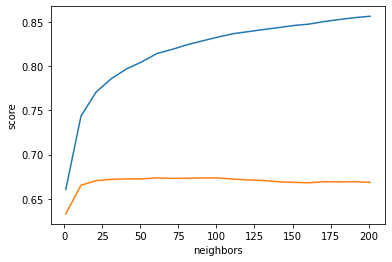

In [23]:
plt.plot(par1['n_neighbors'], list(score_train1[0].values()))
plt.plot(par1['n_neighbors'], list(score_train1[1].values()))
plt.xlabel("neighbors")
plt.ylabel("score")

посмотрим на всякий случай изменение качества и на дальше: на 200-400 соседях

In [16]:
tf_idf = TfidfVectorizer(max_df=0.8, min_df=10, stop_words='english')
par1_2 = {
    'n_neighbors': [i for i in range(201, 402, 10)],
    'weights': [('distance', 'distance')],
    'scores': [recall_score, accuracy_score]
}

In [17]:
folds1 = fold_split(len(y_train), 4)
score_train1_2 = cv_score(X_train, y_train, par1_2, folds1, neighbors.KNeighborsClassifier)

Text(0, 0.5, 'score')

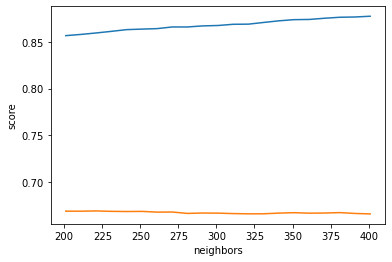

In [18]:
plt.plot(par1_2['n_neighbors'], list(score_train1_2[0].values()))
plt.plot(par1_2['n_neighbors'], list(score_train1_2[1].values()))
plt.xlabel("neighbors")
plt.ylabel("score")

recall немного растёт, accuracy не меняется

In [25]:
for k, v in score_train1_2[1].items():
    if v == max(score_train1_2[1].values()):
        best_par = k
best_par

(221, 'distance')

### Дополнительно

Посмотрим как качестов менялось на ещё большем числе соседей 

In [ ]:
tf_idf = TfidfVectorizer(max_df=0.8, min_df=10, stop_words='english')
par1_3 = {
    'n_neighbors': [i for i in range(1, 1002, 100)],
    'weights': [('distance', 'distance')],
    'scores': [recall_score, accuracy_score]
}

In [ ]:
folds1 = fold_split(len(y_train), 4)
score_train1_3 = cv_score(X_train, y_train, par1_3, folds1, neighbors.KNeighborsClassifier)

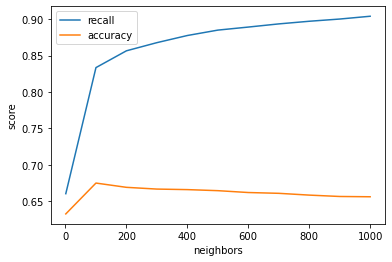

In [13]:
plt.plot(par1_3['n_neighbors'], list(score_train1_3[0].values()), label='recall')
plt.plot(par1_3['n_neighbors'], list(score_train1_3[1].values()), label='accuracy')
plt.xlabel("neighbors")
plt.ylabel("score")
plt.legend()

Accuracy стал понемногу падать

### Обучение на лучших параметрах

In [39]:
neigh = neighbors.KNeighborsClassifier(n_neighbors=best_par[0],
                                      metric='cosine', weights=best_par[1])
scaler = TfidfVectorizer(max_df=0.8, min_df=10, stop_words='english')
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
neigh.fit(X_train, y_train)
score_test1_acc = accuracy_score(y_test, neigh.predict(X_test))
score_test1_rec = recall_score(y_test, neigh.predict(X_test))
score_test1_acc, score_test1_rec

(0.6777913859971423, 0.8603077493511309)

### Демонстрация на конкретных фильмах

Возьмём 20 фильмов с наибольшим числом отзывов и посмотрим сами результат

In [40]:
mv = movies0.sort_values('votes')
mv = mv.tail(20)
demo_np = mv['description'] + ' ' + mv['actors'] + ' ' + mv['original_title'] + ' ' + mv['director'] + ' ' + mv['writer'] + ' ' + mv['production_company']
demo_np = np.array(demo_np)

In [41]:
demo_train = scaler.transform(demo_np)
mv['drama'] = neigh.predict(demo_train)
mv[['original_title','genre', 'drama']]

,original_title,genre,drama
43404,Inglourious Basterds,"Adventure, Drama, War",1.0
26257,The Silence of the Lambs,"Crime, Drama, Thriller",0.0
50773,The Avengers,"Action, Adventure, Sci-Fi",0.0
43935,Batman Begins,"Action, Adventure",0.0
34440,Gladiator,"Action, Adventure, Drama",1.0
62660,Django Unchained,"Drama, Western",0.0
29287,Se7en,"Crime, Drama, Mystery",1.0
50294,Interstellar,"Adventure, Drama, Sci-Fi",1.0
34128,The Lord of the Rings: The Two Towers,"Action, Adventure, Drama",1.0
57234,The Dark Knight Rises,"Action, Adventure",0.0


Ошибки есть, но в целом классификация верная

## Жанр комедия

In [28]:
from sklearn.model_selection import train_test_split
X = movies['description'] + ' ' + movies['actors'] + ' ' + movies['original_title'] + ' ' + movies['director'] + ' ' + movies['writer'] + ' ' + movies['production_company']
X_train, X_test, y_train, y_test = train_test_split(X, movies['comedy'],
                                                    random_state=123, shuffle=True, test_size=0.25)
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

print(f'пример текста\n{X_train[0]}')
print(f'\nразмеры выборок: {len(X_train), len(X_test)}')

пример текста
While on holiday in Rhodes, Athenian war hero Darios becomes involved in two different plots to overthrow the tyrannical king, one from Rhodian patriots and the other from sinister Phoenician agents. Rory Calhoun, Lea Massari, Georges Marchal, Conrado San Martín, Ángel Aranda, Mabel Karr, Mimmo Palmara, Roberto Camardiel, Alfio Caltabiano, George Rigaud, Yann Larvor, Carlo Tamberlani, Félix Fernández, Ignazio Dolce, Antonio Casas Il colosso di Rodi Sergio Leone Ennio De Concini, Sergio Leone Cine-Produzioni Associate

размеры выборок: (58788, 19596)


### Выбор веса (этап 0)

In [29]:
par0 = {
    'n_neighbors': [i for i in range(1, 11)],
    'weights': [('uniform', 'uniform'), ('linear', linear), ('my_exp', my_exp), ('distance', 'distance')],
    'scores': [recall_score]
}

In [ ]:
folds0 = fold_split(len(y_train), 4)
score_train0 = cv_score(X_train, y_train, par0, folds0, neighbors.KNeighborsClassifier)

In [19]:
n = 10
score_weights = {'uniform': 0, 'linear': 0, 'my_exp': 0, 'distance': 0}
for i in score_train0[0].keys():
    score_weights[i[1]] += score_train0[0][i] / n
score_weights

{'uniform': 0.4381890393976558,
 'linear': 0.5140844925609015,
 'my_exp': 0.5629390075229098,
 'distance': 0.5093544166360856}

Экспоненциально взвешенные веса оказались лучше, но их качество не улучшается с ростом числа соседей.

Произведём обучение на большем числе соседей, взвешивая по расстоянию (предположительно это улучшит качество)

### Выбор количества соседей (этап 1)

In [13]:
tf_idf = TfidfVectorizer(max_df=0.8, min_df=10, stop_words='english')
par1 = {
    'n_neighbors': [i for i in range(1, 200, 10)],
    'weights': [('distance', 'distance')],
    'scores': [recall_score, accuracy_score]
}

In [17]:
folds1 = fold_split(len(y_train), 4)
score_train1 = cv_score(X_train, y_train, par1, folds1, neighbors.KNeighborsClassifier)

Text(0, 0.5, 'score')

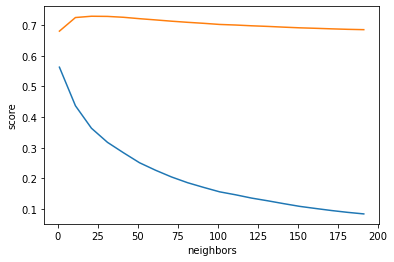

In [18]:
plt.plot(par1['n_neighbors'], list(score_train1[0].values()))
plt.plot(par1['n_neighbors'], list(score_train1[1].values()))
plt.xlabel("neighbors")
plt.ylabel("score")

Предположение не оправдалось. Увеличение числа соседей при взвешивании по расстоянию только снизило качество, остановимся на экспоненциальных в случае комедии.

### Обучение на лучших параметрах

In [25]:
neigh = neighbors.KNeighborsClassifier(n_neighbors=5, 
                                      metric='cosine', weights=my_exp)
scaler = TfidfVectorizer(max_df=0.8, min_df=10, stop_words='english')
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
neigh.fit(X_train, y_train)
score_test1_acc = accuracy_score(y_test, neigh.predict(X_test))
score_test1_rec = recall_score(y_test, neigh.predict(X_test))
score_test1_acc, score_test1_rec

(0.6887119820371504, 0.5811213838353713)

In [33]:
movies['drama'].value_counts()

1.0    43326
0.0    35058
Name: drama, dtype: int64

In [34]:
movies['comedy'].value_counts()

0.0    51877
1.0    26507
Name: comedy, dtype: int64

Класс комедийных фильмов в два раза меньше некомедийных. Это могло повлечь снижение качества recall